In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import os
from pathlib import Path

In [2]:
base_dir = os.path.join('',Path(os.getcwd()).parents[0])
data_dir = os.path.join(base_dir, 'Data')

In [3]:
data = pd.read_csv(data_dir+'/caschool.csv')
data.head()

Observation Number  dist_cod   county                         district  \
0                   1     75119  Alameda               Sunol Glen Unified   
1                   2     61499    Butte             Manzanita Elementary   
2                   3     61549    Butte      Thermalito Union Elementary   
3                   4     61457    Butte  Golden Feather Union Elementary   
4                   5     61523    Butte         Palermo Union Elementary   

  gr_span  enrl_tot   teachers   calw_pct   meal_pct  computer     testscr  \
0   KK-08       195  10.900000   0.510200   2.040800        67  690.799988   
1   KK-08       240  11.150000  15.416700  47.916698       101  661.200012   
2   KK-08      1550  82.900002  55.032299  76.322601       169  643.599976   
3   KK-08       243  14.000000  36.475399  77.049202        85  647.700012   
4   KK-08      1335  71.500000  33.108601  78.427002       171  640.849976   

   comp_stu     expn_stu        str     avginc     el_pct    read_scr  \
0  0.343590  6384.911133  17.889910  22.690001   0.000000  691.599976   
1  0.420833  5099.380859  21.524664   9.824000   4.583333  660.500000   
2  0.109032  5501.954590  18.697226   8.978000  30.000002  636.299988   
3  0.349794  7101.831055  17.357143   8.978000   0.000000  651.900024   
4  0.128090  5235.987793  18.671329   9.080333  13.857677  641.799988   

     math_scr  
0  690.000000  
1  661.900024  
2  650.900024  
3  643.500000  
4  639.900024

In [4]:
data['meal_pct'].describe()

count    420.000000
mean      44.705237
std       27.123381
min        0.000000
25%       23.282200
50%       41.750700
75%       66.864725
max      100.000000
Name: meal_pct, dtype: float64

In [5]:
data.county.value_counts()

Sonoma             29
Kern               27
Los Angeles        27
Tulare             24
San Diego          21
Santa Clara        20
Humboldt           17
San Mateo          17
Shasta             13
Fresno             12
Orange             11
Santa Barbara      11
Merced             11
Placer             11
San Bernardino     10
El Dorado          10
Siskiyou            9
Kings               9
Nevada              9
Ventura             9
Marin               8
Tehama              8
Santa Cruz          7
Sacramento          7
Stanislaus          7
Contra Costa        7
Monterey            7
Sutter              6
Tuolumne            6
Butte               6
San Joaquin         6
Imperial            6
Madera              5
Lassen              5
Riverside           4
San Benito          3
Glenn               3
San Luis Obispo     2
Trinity             2
Yuba                2
Lake                2
Calaveras           1
Mendocino           1
Inyo                1
Alameda             1
Name: coun

In [6]:
data[['calw_pct', 'meal_pct', 'computer']].describe()

calw_pct    meal_pct     computer
count  420.000000  420.000000   420.000000
mean    13.246042   44.705237   303.383333
std     11.454821   27.123381   441.341298
min      0.000000    0.000000     0.000000
25%      4.395375   23.282200    46.000000
50%     10.520450   41.750700   117.500000
75%     18.981350   66.864725   375.250000
max     78.994202  100.000000  3324.000000

In [7]:
data.iloc[:, 7:10].describe()

calw_pct    meal_pct     computer
count  420.000000  420.000000   420.000000
mean    13.246042   44.705237   303.383333
std     11.454821   27.123381   441.341298
min      0.000000    0.000000     0.000000
25%      4.395375   23.282200    46.000000
50%     10.520450   41.750700   117.500000
75%     18.981350   66.864725   375.250000
max     78.994202  100.000000  3324.000000

### 1&2 - Descriptive Statistics

In [8]:
data.columns

Index(['Observation Number', 'dist_cod', 'county', 'district', 'gr_span',
       'enrl_tot', 'teachers', 'calw_pct', 'meal_pct', 'computer', 'testscr',
       'comp_stu', 'expn_stu', 'str', 'avginc', 'el_pct', 'read_scr',
       'math_scr'],
      dtype='object')

In [9]:
data['smallclass'] = data['str']<20
smallclass = data[data['smallclass']==True]
smallclass

Observation Number  dist_cod       county  \
0                     1     75119      Alameda   
2                     3     61549        Butte   
3                     4     61457        Butte   
4                     5     61523        Butte   
6                     7     68536  San Joaquin   
..                  ...       ...          ...   
413                 414     68981    San Mateo   
414                 415     69682  Santa Clara   
415                 416     68957    San Mateo   
416                 417     69518  Santa Clara   
419                 420     72751         Yuba   

                            district gr_span  enrl_tot    teachers   calw_pct  \
0                 Sunol Glen Unified   KK-08       195   10.900000   0.510200   
2        Thermalito Union Elementary   KK-08      1550   82.900002  55.032299   
3    Golden Feather Union Elementary   KK-08       243   14.000000  36.475399   
4           Palermo Union Elementary   KK-08      1335   71.500000  33.108601   
6              Holt Union Elementary   KK-08       195   10.000000  12.903200   
..                               ...     ...       ...         ...        ...   
413        Portola Valley Elementary   KK-08       687   44.590000   0.304900   
414        Saratoga Union Elementary   KK-08      2341  124.089996   0.170900   
415           Las Lomitas Elementary   KK-08       984   59.730000   0.101600   
416             Los Altos Elementary   KK-08      3724  208.479996   1.074100   
419             Wheatland Elementary   KK-08      1778   93.400002   6.923500   

      meal_pct  computer     testscr  comp_stu     expn_stu        str  \
0     2.040800        67  690.799988  0.343590  6384.911133  17.889910   
2    76.322601       169  643.599976  0.109032  5501.954590  18.697226   
3    77.049202        85  647.700012  0.349794  7101.831055  17.357143   
4    78.427002       171  640.849976  0.128090  5235.987793  18.671329   
6    94.623703        28  606.750000  0.143590  5253.331055  19.500000   
..         ...       ...         ...       ...          ...        ...   
413   0.000000       209  699.099976  0.304221  7217.263184  15.407042   
414   0.598000       286  700.300049  0.122170  5392.638672  18.865339   
415   3.556900       195  704.300049  0.198171  7290.338867  16.474134   
416   1.503800       721  706.750000  0.193609  5741.462891  17.862625   
419  47.571201       313  655.750000  0.176040  5993.392578  19.036402   

        avginc     el_pct    read_scr    math_scr  smallclass  
0    22.690001   0.000000  691.599976  690.000000        True  
2     8.978000  30.000002  636.299988  650.900024        True  
3     8.978000   0.000000  651.900024  643.500000        True  
4     9.080333  13.857677  641.799988  639.900024        True  
6     6.577000  68.717949  604.500000  609.000000        True  
..         ...        ...         ...         ...         ...  
413  50.676998   1.164483  698.299988  699.900024        True  
414  40.402000   2.050406  698.900024  701.700012        True  
415  28.716999   5.995935  700.900024  707.700012        True  
416  41.734108   4.726101  704.000000  709.500000        True  
419  12.502000   5.005624  660.500000  651.000000        True  

[238 rows x 19 columns]

In [10]:
data.query("""smallclass==1""").describe()

Observation Number      dist_cod      enrl_tot     teachers  \
count          238.000000    238.000000    238.000000   238.000000   
mean           227.407563  67704.239496   1507.071429    80.194204   
std            121.421633   3549.489615   2510.398070   131.817380   
min              1.000000  61382.000000     81.000000     4.850000   
25%            124.250000  63990.250000    307.500000    17.575000   
50%            229.500000  68631.000000    629.500000    35.112499   
75%            337.500000  70678.000000   1786.250000    94.600000   
max            420.000000  75135.000000  27176.000000  1429.000000   

         calw_pct    meal_pct     computer     testscr    comp_stu  \
count  238.000000  238.000000   238.000000  238.000000  238.000000   
mean    12.951997   41.633079   193.777311  657.351259    0.146658   
std     11.344613   27.271027   318.587674   19.358012    0.066752   
min      0.000000    0.000000     0.000000  606.750000    0.000000   
25%      3.994825   20.506674    37.250000  643.524994    0.103460   
50%     10.215700   37.066500    84.500000  656.525024    0.131993   
75%     18.513400   63.851748   247.000000  669.912506    0.185726   
max     58.752201  100.000000  3324.000000  706.750000    0.358974   

          expn_stu         str      avginc      el_pct    read_scr    math_scr  
count   238.000000  238.000000  238.000000  238.000000  238.000000  238.000000  
mean   5540.316183   18.383887   16.335805   12.534326  658.826050  655.876468  
std     670.522035    1.283886    8.552967   16.819417   20.152532   19.356639  
min    4136.250977   14.000000    5.699000    0.000000  604.500000  609.000000  
25%    5131.536499   17.699945   11.116000    1.010545  644.349991  642.624985  
50%    5399.535157   18.739755   14.050125    4.958952  657.899994  654.500000  
75%    5810.176635   19.344734   18.319098   17.128223  672.125015  668.574982  
max    7711.506836   19.961538   55.327999   85.539719  704.000000  709.500000

In [11]:
print(data.query("""smallclass==1""").describe()==smallclass.describe())

       Observation Number  dist_cod  enrl_tot  teachers  calw_pct  meal_pct  \
count                True      True      True      True      True      True   
mean                 True      True      True      True      True      True   
std                  True      True      True      True      True      True   
min                  True      True      True      True      True      True   
25%                  True      True      True      True      True      True   
50%                  True      True      True      True      True      True   
75%                  True      True      True      True      True      True   
max                  True      True      True      True      True      True   

       computer  testscr  comp_stu  expn_stu   str  avginc  el_pct  read_scr  \
count      True     True      True      True  True    True    True      True   
mean       True     True      True      True  True    True    True      True   
std        True     True      True      True  Tr

**Running a Ttest**

We will test the hypothesis that the average test scores from small classes are no different than the average test scores from larger classes

In [12]:
data1 = smallclass
data2 = data[data['smallclass']==False]
stats.ttest_ind(data1['testscr'],data2['testscr'])

Ttest_indResult(statistic=3.9991928467186746, pvalue=7.515397707407867e-05)

By default, ttests assume equal variance, which is not always a realistic assumption. We can change it through the parameter equal_var

In [13]:
stats.ttest_ind(data1['testscr'],data2['testscr'],equal_var=False)

Ttest_indResult(statistic=4.042581850024987, pvalue=6.332554389988754e-05)

The tstatistic shows clearly that we have to reject the H0, given that p-value is 0, so there is no posibility that there's no difference btw scores from small and larger classes

**Explaining the relationship between two variables (or the evolution of one through another) - Simple Regression**

In [14]:
b, a, r_value, p_value, std_err = stats.linregress(data1['teachers'],data1['testscr'])
rsq = r_value**2
print('b = {}'.format(b.round(2)))
print('a = {}'.format(a.round(2)))
print(p_value)
print(std_err)
print(rsq)

b = -0.01
a = 658.23
0.24988751005681747
0.009532599176510618
0.005606003122857343


In [15]:
print('y = {}x + {}'.format(b.round(2),a.round(2)))

y = -0.01x + 658.23


C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


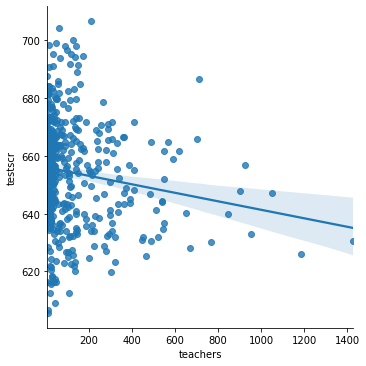

In [16]:
import seaborn as sns
sns.lmplot('teachers', 'testscr', data, order=1)

**Through groupby we can obtain several stats for a parameter grouping by any criteria. We are interested in knowing the score mean by county and class**

In [17]:
data['county'].value_counts().shape[0] #shows the number of different counties we have

45

In [18]:
data.groupby(['county','smallclass'])['testscr'].mean()

county        smallclass
Alameda       True          690.799988
Butte         False         661.200012
              True          641.979980
Calaveras     False         656.800049
Contra Costa  False         671.312530
                               ...    
Tuolumne      True          655.666646
Ventura       False         643.662491
              True          666.650024
Yuba          False         672.200012
              True          655.750000
Name: testscr, Length: 80, dtype: float64

In [19]:
data.groupby(['county'])['testscr'].mean()

county
Alameda            690.799988
Butte              645.183319
Calaveras          656.800049
Contra Costa       673.578587
El Dorado          664.965002
Fresno             636.237503
Glenn              660.966675
Humboldt           658.014699
Imperial           640.683350
Inyo               659.400024
Kern               639.290742
Kings              647.788893
Lake               641.474976
Lassen             661.010010
Los Angeles        645.537048
Madera             653.489990
Marin              680.525024
Mendocino          639.300049
Merced             636.250000
Monterey           637.264282
Nevada             666.161106
Orange             654.318187
Placer             665.931818
Riverside          640.512482
Sacramento         637.199995
San Benito         650.016642
San Bernardino     648.789984
San Diego          660.423805
San Joaquin        643.641652
San Luis Obispo    665.574982
San Mateo          668.991182
Santa Barbara      666.559104
Santa Clara        665.257498
San

In [20]:
data.groupby(['smallclass'])['testscr'].mean()

smallclass
False    649.978849
True     657.351259
Name: testscr, dtype: float64

In [21]:
data.groupby('county').agg({'testscr': np.average})

testscr
county                     
Alameda          690.799988
Butte            645.183319
Calaveras        656.800049
Contra Costa     673.578587
El Dorado        664.965002
Fresno           636.237503
Glenn            660.966675
Humboldt         658.014699
Imperial         640.683350
Inyo             659.400024
Kern             639.290742
Kings            647.788893
Lake             641.474976
Lassen           661.010010
Los Angeles      645.537048
Madera           653.489990
Marin            680.525024
Mendocino        639.300049
Merced           636.250000
Monterey         637.264282
Nevada           666.161106
Orange           654.318187
Placer           665.931818
Riverside        640.512482
Sacramento       637.199995
San Benito       650.016642
San Bernardino   648.789984
San Diego        660.423805
San Joaquin      643.641652
San Luis Obispo  665.574982
San Mateo        668.991182
Santa Barbara    666.559104
Santa Clara      665.257498
Santa Cruz       674.600002
Shasta           658.834618
Siskiyou         650.677782
Sonoma           664.543106
Stanislaus       654.992850
Sutter           649.941671
Tehama           653.262489
Trinity          676.549988
Tulare           638.691666
Tuolumne         655.666646
Ventura          646.216661
Yuba             663.975006

In [22]:
data.groupby('county')['testscr'].agg(['min', 'max','mean'])

min         max        mean
county                                             
Alameda          690.799988  690.799988  690.799988
Butte            637.949951  661.200012  645.183319
Calaveras        656.800049  656.800049  656.800049
Contra Costa     635.049988  698.199951  673.578587
El Dorado        644.400024  673.900024  664.965002
Fresno           605.550049  672.550049  636.237503
Glenn            651.800049  666.150024  660.966675
Humboldt         635.199951  678.050049  658.014699
Imperial         620.500000  653.550049  640.683350
Inyo             659.400024  659.400024  659.400024
Kern             609.000000  670.000000  639.290742
Kings            633.650024  668.400024  647.788893
Lake             637.349976  645.599976  641.474976
Lassen           651.900024  672.450012  661.010010
Los Angeles      619.799988  679.650024  645.537048
Madera           631.400024  672.299988  653.489990
Marin            656.800049  694.250000  680.525024
Mendocino        639.300049  639.300049  639.300049
Merced           615.750000  661.349976  636.250000
Monterey         623.200012  679.800049  637.264282
Nevada           654.199951  677.950012  666.161106
Orange           633.150024  671.250000  654.318187
Placer           650.900024  676.599976  665.931818
Riverside        628.750000  653.400024  640.512482
Sacramento       612.650024  654.599976  637.199995
San Benito       639.500000  655.699951  650.016642
San Bernardino   626.099976  665.200012  648.789984
San Diego        624.550049  695.199951  660.423805
San Joaquin      606.750000  655.400024  643.641652
San Luis Obispo  658.799988  672.349976  665.574982
San Mateo        627.250000  704.300049  668.991182
Santa Barbara    631.900024  698.449951  666.559104
Santa Clara      630.349976  706.750000  665.257498
Santa Cruz       653.099976  687.549988  674.600002
Shasta           641.549988  683.400024  658.834618
Siskiyou         635.450012  666.849976  650.677782
Sonoma           634.150024  682.450012  664.543106
Stanislaus       643.700012  681.599976  654.992850
Sutter           639.250000  657.150024  649.941671
Tehama           642.199951  669.349976  653.262489
Trinity          676.150024  676.949951  676.549988
Tulare           616.299988  668.799988  638.691666
Tuolumne         644.199951  666.699951  655.666646
Ventura          628.250000  676.849976  646.216661
Yuba             655.750000  672.200012  663.975006

### 3- Data Visualizations

**3.1 - Histograms**

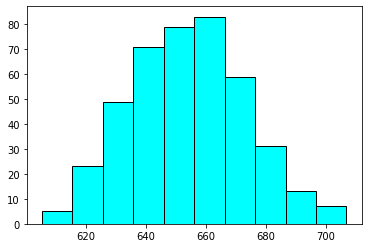

In [23]:
import matplotlib.pyplot as plt
schools = pd.read_csv(data_dir+'/caschool.csv')
plt.hist(schools.testscr,color='cyan',edgecolor='black')
plt.show()

Optimizing the distribution look through bins

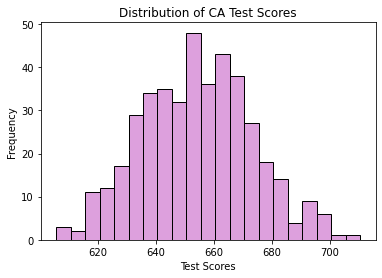

In [24]:
bins= np.arange(min(schools.testscr),max(schools.testscr)+5,5)
plt.hist(schools.testscr,bins=bins,color='plum',edgecolor='black')
plt.title('Distribution of CA Test Scores')
plt.ylabel('Frequency')
plt.xlabel('Test Scores')
plt.show()

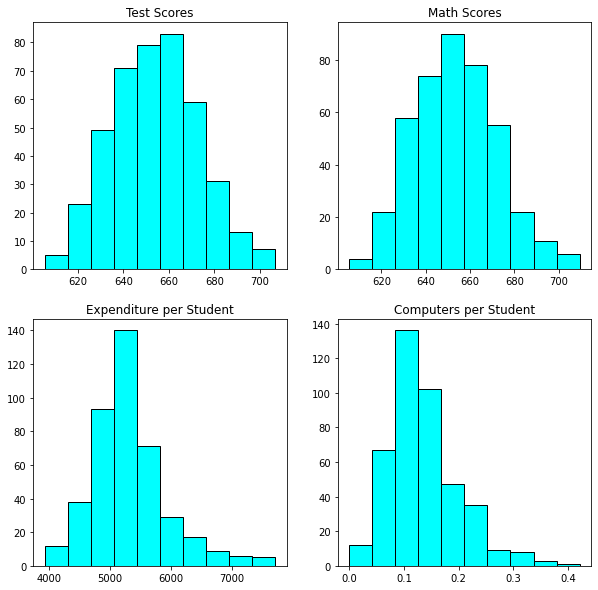

In [25]:
f, axarr = plt.subplots(2,2,figsize=(10,10))
axarr[0,0].hist(schools.testscr,color='cyan',edgecolor='black')
axarr[0,0].set_title('Test Scores')

axarr[0,1].hist(schools.math_scr,color='cyan',edgecolor='black')
axarr[0,1].set_title('Math Scores')

axarr[1,0].hist(schools.expn_stu,color='cyan',edgecolor='black')
axarr[1,0].set_title('Expenditure per Student')

axarr[1,1].hist(schools.comp_stu,color='cyan',edgecolor='black')
axarr[1,1].set_title('Computers per Student')

plt.show()

C:\Users\aleex\AppData\Roaming\Python\Python38\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


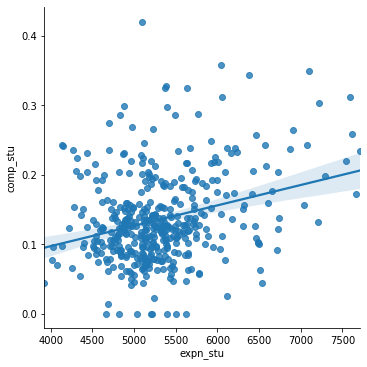

In [26]:
sns.lmplot('expn_stu', 'comp_stu', schools)

In [27]:
b, a, r_value, p_value, std_err = stats.linregress(schools['expn_stu'],schools['comp_stu'])
rsq = r_value**2
print('b = {}'.format(b.round(5)))
print('a = {}'.format(a.round(2)))
print(p_value)
print(std_err)
print(rsq)

b = 3e-05
a = -0.02
2.2162098192402836e-09
4.80150663889e-06
0.08211639080627578


**3.2. Boxplots**

*This section of econometrics with python deals with boxplots. Boxplots are extremely useful for viewing information about the distribution of certain variables and for comparing categorie*

In [28]:
schools.head()

Observation Number  dist_cod   county                         district  \
0                   1     75119  Alameda               Sunol Glen Unified   
1                   2     61499    Butte             Manzanita Elementary   
2                   3     61549    Butte      Thermalito Union Elementary   
3                   4     61457    Butte  Golden Feather Union Elementary   
4                   5     61523    Butte         Palermo Union Elementary   

  gr_span  enrl_tot   teachers   calw_pct   meal_pct  computer     testscr  \
0   KK-08       195  10.900000   0.510200   2.040800        67  690.799988   
1   KK-08       240  11.150000  15.416700  47.916698       101  661.200012   
2   KK-08      1550  82.900002  55.032299  76.322601       169  643.599976   
3   KK-08       243  14.000000  36.475399  77.049202        85  647.700012   
4   KK-08      1335  71.500000  33.108601  78.427002       171  640.849976   

   comp_stu     expn_stu        str     avginc     el_pct    read_scr  \
0  0.343590  6384.911133  17.889910  22.690001   0.000000  691.599976   
1  0.420833  5099.380859  21.524664   9.824000   4.583333  660.500000   
2  0.109032  5501.954590  18.697226   8.978000  30.000002  636.299988   
3  0.349794  7101.831055  17.357143   8.978000   0.000000  651.900024   
4  0.128090  5235.987793  18.671329   9.080333  13.857677  641.799988   

     math_scr  
0  690.000000  
1  661.900024  
2  650.900024  
3  643.500000  
4  639.900024

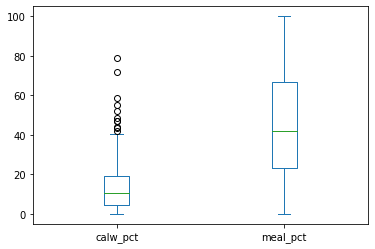

In [29]:
df = schools[['calw_pct','meal_pct']]
df.plot.box()
plt.show()

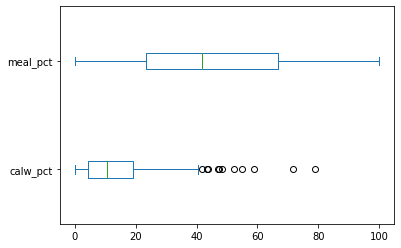

In [30]:
df.plot.box(vert=False)
plt.show()

*How to customize colors for boxplots*

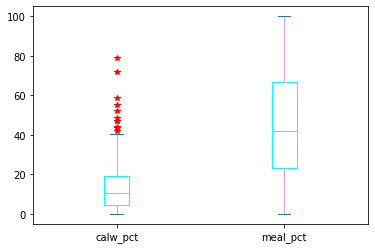

In [31]:
colors = dict(boxes = 'cyan', whiskers='plum',
         medians='lightsalmon')
df.plot.box(color=colors,sym='r*') # 'ro' stands for red point, 'r*'' is red star, and 'r^' is a read peak
plt.show()

**Prettifying our plots - SEABORN**

In [32]:
schools['smallclass'] = schools['str'] < 20
schools

Observation Number  dist_cod       county  \
0                     1     75119      Alameda   
1                     2     61499        Butte   
2                     3     61549        Butte   
3                     4     61457        Butte   
4                     5     61523        Butte   
..                  ...       ...          ...   
415                 416     68957    San Mateo   
416                 417     69518  Santa Clara   
417                 418     72611      Ventura   
418                 419     72744         Yuba   
419                 420     72751         Yuba   

                            district gr_span  enrl_tot    teachers   calw_pct  \
0                 Sunol Glen Unified   KK-08       195   10.900000   0.510200   
1               Manzanita Elementary   KK-08       240   11.150000  15.416700   
2        Thermalito Union Elementary   KK-08      1550   82.900002  55.032299   
3    Golden Feather Union Elementary   KK-08       243   14.000000  36.475399   
4           Palermo Union Elementary   KK-08      1335   71.500000  33.108601   
..                               ...     ...       ...         ...        ...   
415           Las Lomitas Elementary   KK-08       984   59.730000   0.101600   
416             Los Altos Elementary   KK-08      3724  208.479996   1.074100   
417           Somis Union Elementary   KK-08       441   20.150000   3.563500   
418                Plumas Elementary   KK-08       101    5.000000  11.881200   
419             Wheatland Elementary   KK-08      1778   93.400002   6.923500   

      meal_pct  computer     testscr  comp_stu     expn_stu        str  \
0     2.040800        67  690.799988  0.343590  6384.911133  17.889910   
1    47.916698       101  661.200012  0.420833  5099.380859  21.524664   
2    76.322601       169  643.599976  0.109032  5501.954590  18.697226   
3    77.049202        85  647.700012  0.349794  7101.831055  17.357143   
4    78.427002       171  640.849976  0.128090  5235.987793  18.671329   
..         ...       ...         ...       ...          ...        ...   
415   3.556900       195  704.300049  0.198171  7290.338867  16.474134   
416   1.503800       721  706.750000  0.193609  5741.462891  17.862625   
417  37.193802        45  645.000000  0.102041  4402.831543  21.885857   
418  59.405899        14  672.200012  0.138614  4776.336426  20.200001   
419  47.571201       313  655.750000  0.176040  5993.392578  19.036402   

        avginc     el_pct    read_scr    math_scr  smallclass  
0    22.690001   0.000000  691.599976  690.000000        True  
1     9.824000   4.583333  660.500000  661.900024       False  
2     8.978000  30.000002  636.299988  650.900024        True  
3     8.978000   0.000000  651.900024  643.500000        True  
4     9.080333  13.857677  641.799988  639.900024        True  
..         ...        ...         ...         ...         ...  
415  28.716999   5.995935  700.900024  707.700012        True  
416  41.734108   4.726101  704.000000  709.500000        True  
417  23.733000  24.263039  648.299988  641.700012       False  
418   9.952000   2.970297  667.900024  676.500000       False  
419  12.502000   5.005624  660.500000  651.000000        True  

[420 rows x 19 columns]

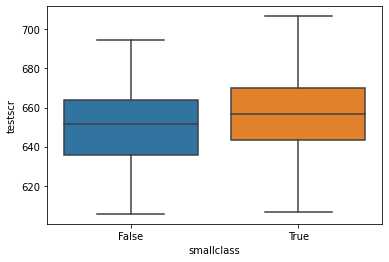

In [33]:
sns.boxplot(x='smallclass',y='testscr',data=schools) #Comparing test notes for both small and large classes
plt.show()

*Seaborn is built off of matplotlib, so many of the methods you use with matplotlib still apply with seaborn (ie setting xy labels and calling plt.show).*

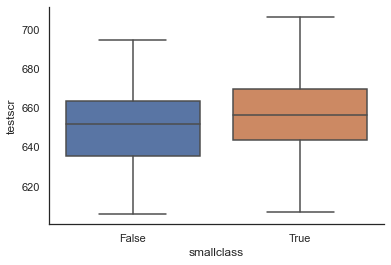

In [34]:
sns.set(style='white') # removing grey background
sns.boxplot(x='smallclass',y='testscr',data=schools)
sns.despine()
plt.show()

*Customizing labels on seaborn - We can do this by creating a new variable called ‘classtype’*

In [35]:
converter = {0:"larger class", 1:"smaller class"}
schools['classtype'] = schools.smallclass.apply(lambda x:converter[x])
schools

Observation Number  dist_cod       county  \
0                     1     75119      Alameda   
1                     2     61499        Butte   
2                     3     61549        Butte   
3                     4     61457        Butte   
4                     5     61523        Butte   
..                  ...       ...          ...   
415                 416     68957    San Mateo   
416                 417     69518  Santa Clara   
417                 418     72611      Ventura   
418                 419     72744         Yuba   
419                 420     72751         Yuba   

                            district gr_span  enrl_tot    teachers   calw_pct  \
0                 Sunol Glen Unified   KK-08       195   10.900000   0.510200   
1               Manzanita Elementary   KK-08       240   11.150000  15.416700   
2        Thermalito Union Elementary   KK-08      1550   82.900002  55.032299   
3    Golden Feather Union Elementary   KK-08       243   14.000000  36.475399   
4           Palermo Union Elementary   KK-08      1335   71.500000  33.108601   
..                               ...     ...       ...         ...        ...   
415           Las Lomitas Elementary   KK-08       984   59.730000   0.101600   
416             Los Altos Elementary   KK-08      3724  208.479996   1.074100   
417           Somis Union Elementary   KK-08       441   20.150000   3.563500   
418                Plumas Elementary   KK-08       101    5.000000  11.881200   
419             Wheatland Elementary   KK-08      1778   93.400002   6.923500   

      meal_pct  computer     testscr  comp_stu     expn_stu        str  \
0     2.040800        67  690.799988  0.343590  6384.911133  17.889910   
1    47.916698       101  661.200012  0.420833  5099.380859  21.524664   
2    76.322601       169  643.599976  0.109032  5501.954590  18.697226   
3    77.049202        85  647.700012  0.349794  7101.831055  17.357143   
4    78.427002       171  640.849976  0.128090  5235.987793  18.671329   
..         ...       ...         ...       ...          ...        ...   
415   3.556900       195  704.300049  0.198171  7290.338867  16.474134   
416   1.503800       721  706.750000  0.193609  5741.462891  17.862625   
417  37.193802        45  645.000000  0.102041  4402.831543  21.885857   
418  59.405899        14  672.200012  0.138614  4776.336426  20.200001   
419  47.571201       313  655.750000  0.176040  5993.392578  19.036402   

        avginc     el_pct    read_scr    math_scr  smallclass      classtype  
0    22.690001   0.000000  691.599976  690.000000        True  smaller class  
1     9.824000   4.583333  660.500000  661.900024       False   larger class  
2     8.978000  30.000002  636.299988  650.900024        True  smaller class  
3     8.978000   0.000000  651.900024  643.500000        True  smaller class  
4     9.080333  13.857677  641.799988  639.900024        True  smaller class  
..         ...        ...         ...         ...         ...            ...  
415  28.716999   5.995935  700.900024  707.700012        True  smaller class  
416  41.734108   4.726101  704.000000  709.500000        True  smaller class  
417  23.733000  24.263039  648.299988  641.700012       False   larger class  
418   9.952000   2.970297  667.900024  676.500000       False   larger class  
419  12.502000   5.005624  660.500000  651.000000        True  smaller class  

[420 rows x 20 columns]

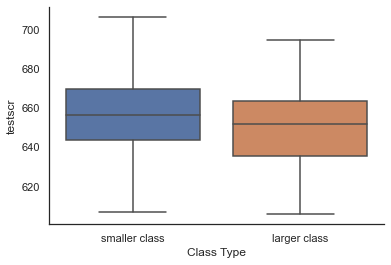

In [36]:
sns.boxplot(x="classtype", y="testscr", data=schools)
sns.despine()
plt.xlabel('Class Type')
plt.show()

*Seaborn Color Palettes*

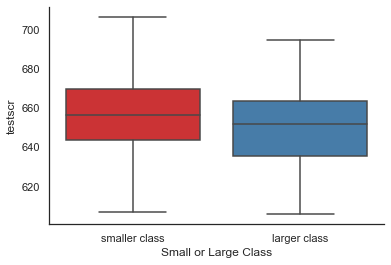

In [37]:
sns.boxplot(x="classtype", y="testscr", data=schools,palette = 'Set1')
plt.xlabel('Small or Large Class')
sns.despine()
plt.show()

*Seaborn notations*

In [38]:
n = list(schools['smallclass'].value_counts().values)
n = ["n: {}".format(x)  for x in n]
n

['n: 238', 'n: 182']

In [39]:
medians = schools.groupby(['smallclass'])['testscr'].median()
medians

smallclass
False    651.625030
True     656.525024
Name: testscr, dtype: float64

In [40]:
x = range(len(n))
x

range(0, 2)

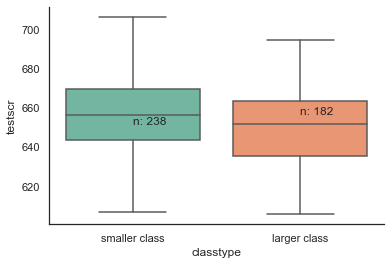

In [41]:
arr = sns.boxplot(x="classtype", y="testscr", data=schools,palette = 'Set2')
sns.despine()
for x,y in zip(x,medians):
    plt.annotate(n[x],
                (x,y))
plt.show()

*Adding a categorical parameter to a Seaborn plot*

In [42]:
def amount_of_teachers(x):
    if x < 30:
        return 'Small'
    elif 30 <= x < 60:
        return "Medium"
    else:
        return "Large"
schools['amountofteachers'] = schools['teachers'].apply(amount_of_teachers) # we apply to a series a function that categorizes the column teachers by small, medium or large
schools

Observation Number  dist_cod       county  \
0                     1     75119      Alameda   
1                     2     61499        Butte   
2                     3     61549        Butte   
3                     4     61457        Butte   
4                     5     61523        Butte   
..                  ...       ...          ...   
415                 416     68957    San Mateo   
416                 417     69518  Santa Clara   
417                 418     72611      Ventura   
418                 419     72744         Yuba   
419                 420     72751         Yuba   

                            district gr_span  enrl_tot    teachers   calw_pct  \
0                 Sunol Glen Unified   KK-08       195   10.900000   0.510200   
1               Manzanita Elementary   KK-08       240   11.150000  15.416700   
2        Thermalito Union Elementary   KK-08      1550   82.900002  55.032299   
3    Golden Feather Union Elementary   KK-08       243   14.000000  36.475399   
4           Palermo Union Elementary   KK-08      1335   71.500000  33.108601   
..                               ...     ...       ...         ...        ...   
415           Las Lomitas Elementary   KK-08       984   59.730000   0.101600   
416             Los Altos Elementary   KK-08      3724  208.479996   1.074100   
417           Somis Union Elementary   KK-08       441   20.150000   3.563500   
418                Plumas Elementary   KK-08       101    5.000000  11.881200   
419             Wheatland Elementary   KK-08      1778   93.400002   6.923500   

      meal_pct  computer  ...  comp_stu     expn_stu        str     avginc  \
0     2.040800        67  ...  0.343590  6384.911133  17.889910  22.690001   
1    47.916698       101  ...  0.420833  5099.380859  21.524664   9.824000   
2    76.322601       169  ...  0.109032  5501.954590  18.697226   8.978000   
3    77.049202        85  ...  0.349794  7101.831055  17.357143   8.978000   
4    78.427002       171  ...  0.128090  5235.987793  18.671329   9.080333   
..         ...       ...  ...       ...          ...        ...        ...   
415   3.556900       195  ...  0.198171  7290.338867  16.474134  28.716999   
416   1.503800       721  ...  0.193609  5741.462891  17.862625  41.734108   
417  37.193802        45  ...  0.102041  4402.831543  21.885857  23.733000   
418  59.405899        14  ...  0.138614  4776.336426  20.200001   9.952000   
419  47.571201       313  ...  0.176040  5993.392578  19.036402  12.502000   

        el_pct    read_scr    math_scr  smallclass      classtype  \
0     0.000000  691.599976  690.000000        True  smaller class   
1     4.583333  660.500000  661.900024       False   larger class   
2    30.000002  636.299988  650.900024        True  smaller class   
3     0.000000  651.900024  643.500000        True  smaller class   
4    13.857677  641.799988  639.900024        True  smaller class   
..         ...         ...         ...         ...            ...   
415   5.995935  700.900024  707.700012        True  smaller class   
416   4.726101  704.000000  709.500000        True  smaller class   
417  24.263039  648.299988  641.700012       False   larger class   
418   2.970297  667.900024  676.500000       False   larger class   
419   5.005624  660.500000  651.000000        True  smaller class   

    amountofteachers  
0              Small  
1              Small  
2              Large  
3              Small  
4              Large  
..               ...  
415           Medium  
416            Large  
417            Small  
418            Small  
419            Large  

[420 rows x 21 columns]

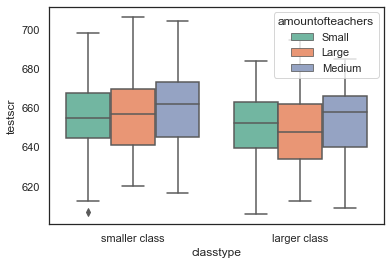

In [43]:
sns.boxplot(x="classtype", y="testscr",data=schools,palette = 'Set2',hue='amountofteachers')
sns.set(rc={'figure.figsize':(11,8)},style='white') #setting the size and the background color
plt.show()

*Seaborn main feature is beauty, so when plots don’t need to look fancy, I just stick to matplotlib in order to make it simpler*

**3.3. Scatterplots**

In [44]:
schools.head()

Observation Number  dist_cod   county                         district  \
0                   1     75119  Alameda               Sunol Glen Unified   
1                   2     61499    Butte             Manzanita Elementary   
2                   3     61549    Butte      Thermalito Union Elementary   
3                   4     61457    Butte  Golden Feather Union Elementary   
4                   5     61523    Butte         Palermo Union Elementary   

  gr_span  enrl_tot   teachers   calw_pct   meal_pct  computer  ...  comp_stu  \
0   KK-08       195  10.900000   0.510200   2.040800        67  ...  0.343590   
1   KK-08       240  11.150000  15.416700  47.916698       101  ...  0.420833   
2   KK-08      1550  82.900002  55.032299  76.322601       169  ...  0.109032   
3   KK-08       243  14.000000  36.475399  77.049202        85  ...  0.349794   
4   KK-08      1335  71.500000  33.108601  78.427002       171  ...  0.128090   

      expn_stu        str     avginc     el_pct    read_scr    math_scr  \
0  6384.911133  17.889910  22.690001   0.000000  691.599976  690.000000   
1  5099.380859  21.524664   9.824000   4.583333  660.500000  661.900024   
2  5501.954590  18.697226   8.978000  30.000002  636.299988  650.900024   
3  7101.831055  17.357143   8.978000   0.000000  651.900024  643.500000   
4  5235.987793  18.671329   9.080333  13.857677  641.799988  639.900024   

   smallclass      classtype amountofteachers  
0        True  smaller class            Small  
1       False   larger class            Small  
2        True  smaller class            Large  
3        True  smaller class            Small  
4        True  smaller class            Large  

[5 rows x 21 columns]

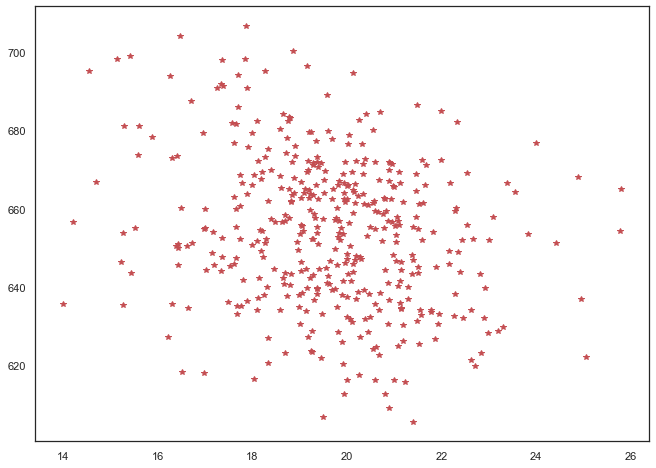

In [45]:
plt.plot(schools.str,schools.testscr,'r*')
plt.show()

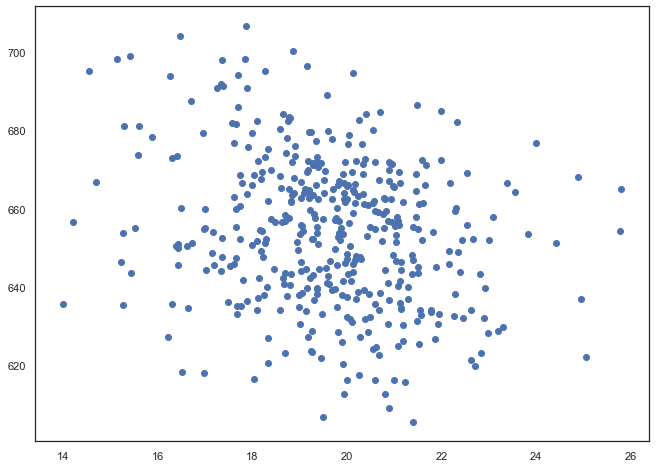

In [46]:
plt.scatter(schools.str,schools.testscr)
plt.show()

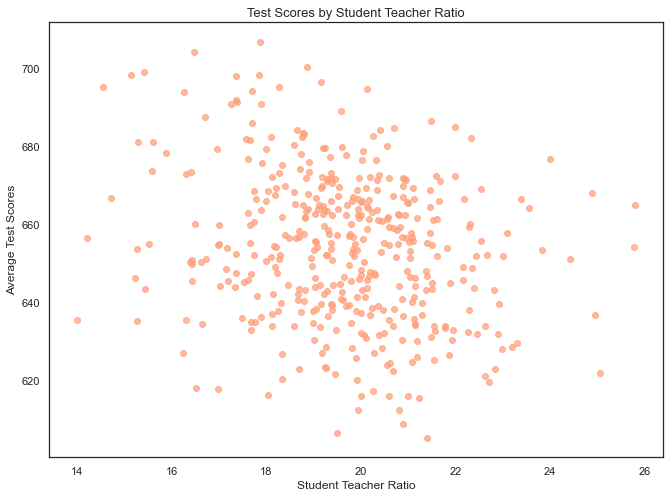

In [47]:
plt.scatter(schools.str,schools.testscr, color='lightsalmon',alpha=0.75)
plt.title('Test Scores by Student Teacher Ratio',size=13)
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Average Test Scores')

plt.show()

**Simple Regression - Two Ways**

b,a= np.polyfit(x,y,1)

line_reg = [b*i + a for i in x]

plt.plot(x, line_reg, label=reg.format(b.round(2),a.round(2)))

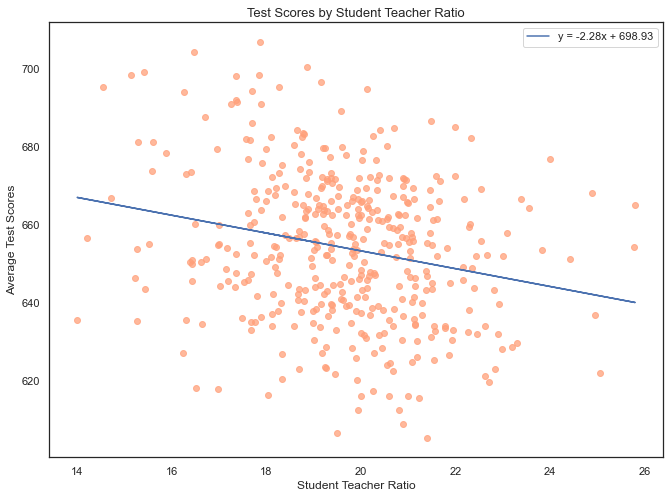

In [48]:
b, a = np.polyfit(schools.str, schools.testscr, 1)
line_reg = [b*i + a for i in schools.str]
reg = 'y = {}x + {}'

plt.scatter(schools.str,schools.testscr, color='lightsalmon',alpha=0.75)
plt.title('Test Scores by Student Teacher Ratio',size=13)
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Average Test Scores')

plt.plot(schools.str, line_reg, label=reg.format(b.round(2),a.round(2)))
plt.legend()
plt.show()

b,a = stats.linregress(x,y)[:1]

line_reg = [b*i + a for i in x]

plt.plot(x, line_reg, label=reg.format(b.round(2),a.round(2)))

In [49]:
bb, aa, r_value, p_value, std_err = stats.linregress(x=schools.str,y=schools.testscr)
print('b = {}'.format(bb.round(2)))
print('a = {}'.format(aa.round(2)))
print('r2 = {}'.format((r_value**2).round(2)))

b = -2.28
a = 698.93
r2 = 0.05


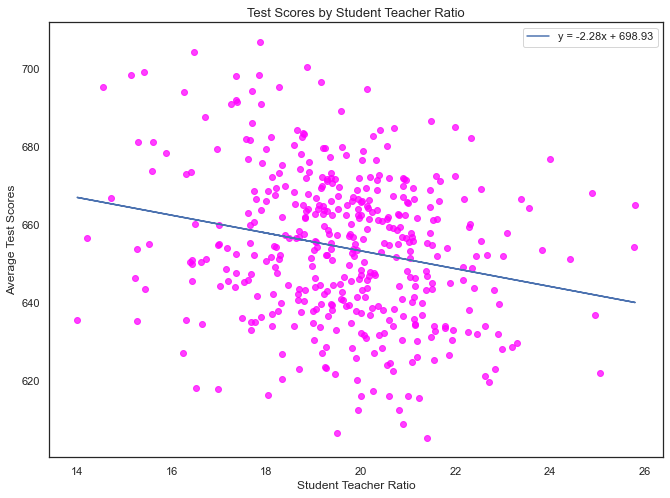

In [50]:
line_reg = [bb*i + aa for i in schools.str]

plt.scatter(schools.str,schools.testscr, color='fuchsia',alpha=0.75)
plt.title('Test Scores by Student Teacher Ratio',size=13)
plt.xlabel('Student Teacher Ratio')
plt.ylabel('Average Test Scores')

plt.plot(schools.str, line_reg, 'b',label=reg.format(bb.round(2),aa.round(2)))
plt.legend()
plt.show()

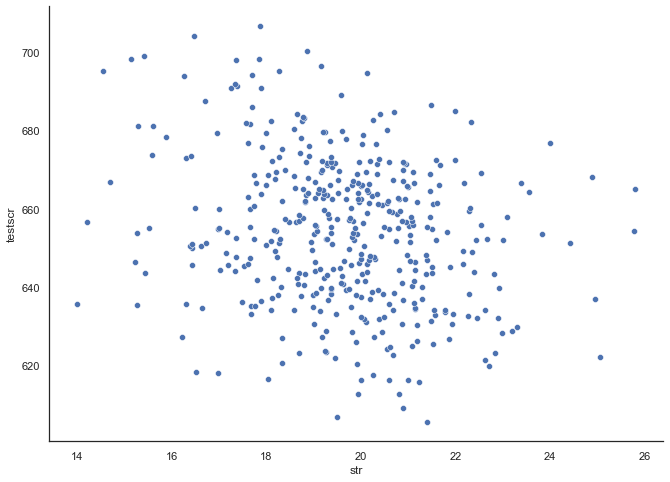

In [51]:
# With seaborn

sns.set(style='white')
sns.scatterplot(x='str',y='testscr',data=schools)
sns.despine()
plt.show()

In [52]:
schools['smallclass']

0       True
1      False
2       True
3       True
4       True
       ...  
415     True
416     True
417    False
418    False
419     True
Name: smallclass, Length: 420, dtype: bool

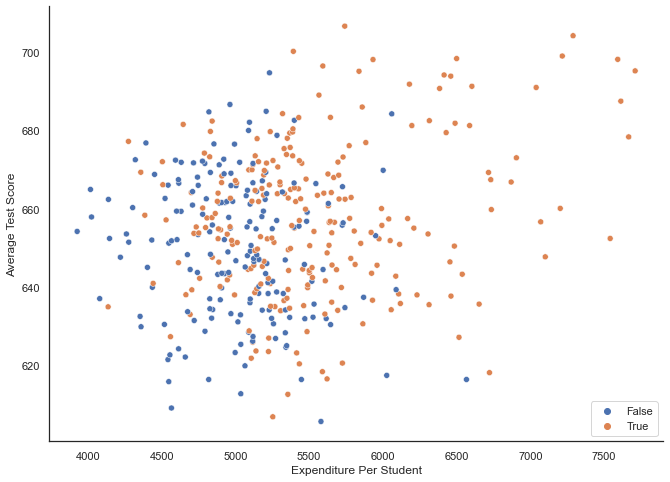

In [53]:
sns.scatterplot(x='expn_stu', y='testscr', hue='smallclass',
                data=schools)
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
plt.legend(loc='lower right')
sns.despine()
plt.show()

In [54]:
schools['amountofteachers']

0       Small
1       Small
2       Large
3       Small
4       Large
        ...  
415    Medium
416     Large
417     Small
418     Small
419     Large
Name: amountofteachers, Length: 420, dtype: object

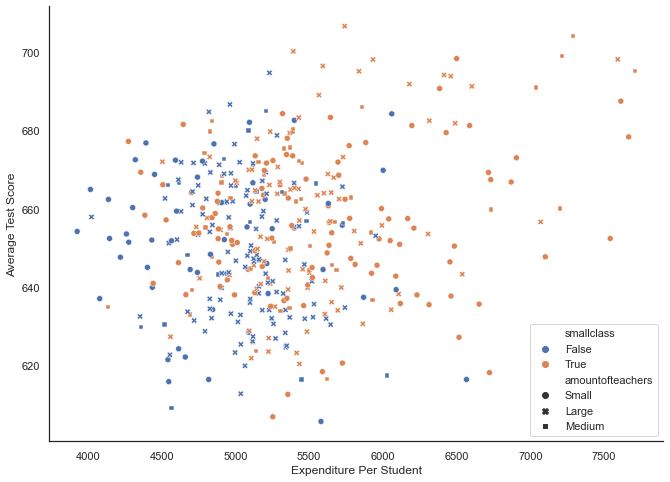

In [55]:
sns.scatterplot(x='expn_stu', y='testscr', hue='smallclass',
                style = 'amountofteachers',
                data=schools)
sns.despine()

plt.legend(loc='lower right')
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
plt.show()

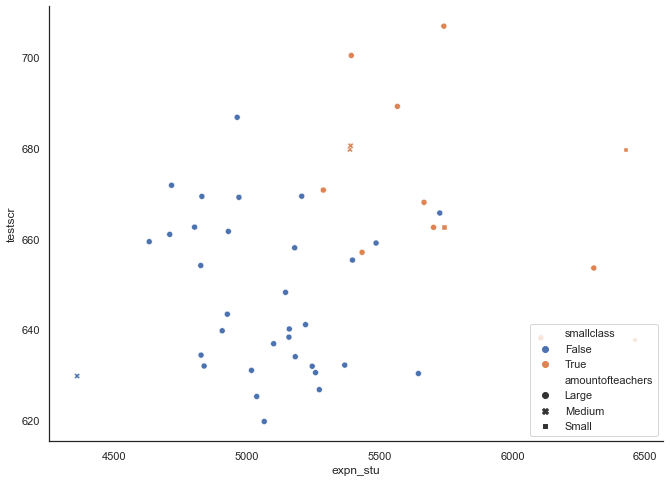

In [56]:
# plotting a subset of data. In this case, jut two of the counties' data will be displayed

sns.scatterplot(x='expn_stu', y='testscr', hue='smallclass',
                style = 'amountofteachers', data = schools.query("""(county=='Santa Clara')or(county=='Los Angeles')"""))

sns.despine()
plt.legend(loc='lower right')
plt.show()

**3.4. RegPlots (SEABORN)**

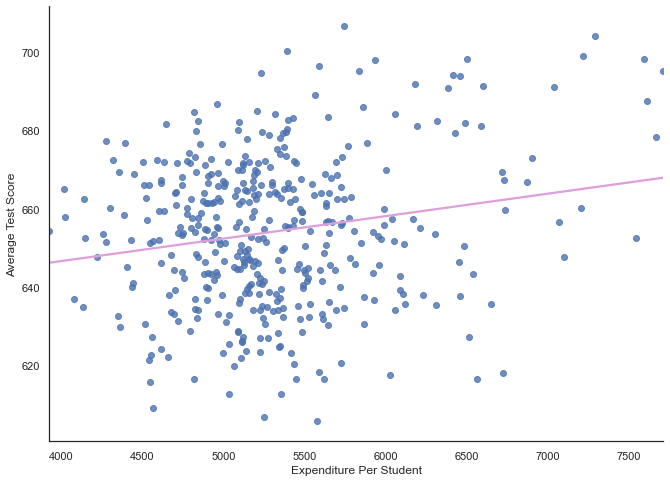

In [57]:
sns.regplot(x='expn_stu', y='testscr', data = schools,ci=False,line_kws = {'color':'plum'})
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
sns.despine()

plt.show()

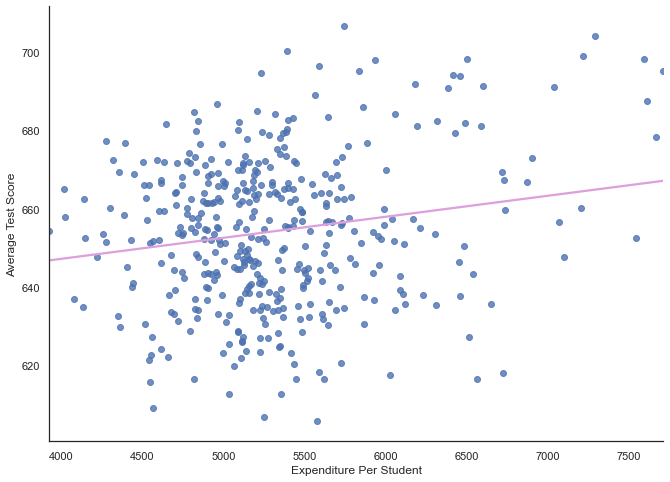

In [58]:
sns.regplot(x='expn_stu', y='testscr', data = schools,ci=False,line_kws = {'color':'plum'},robust=True)
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
sns.despine()

plt.show()

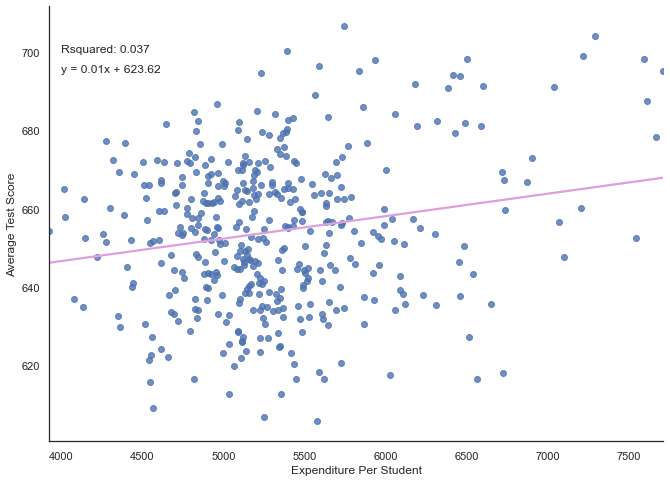

In [59]:
rsq = round((stats.linregress(x=schools.expn_stu,y=schools.testscr)[2]**2),3)
b, a, r_value, p_value, std_err = stats.linregress(x=schools.expn_stu,y=schools.testscr)
sns.regplot(x='expn_stu', y='testscr', data = schools,ci=False,line_kws = {'color':'plum'})
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
sns.despine()

plt.annotate('Rsquared: {}'.format(rsq),
            (4000, 700))
plt.annotate('y = {}x + {}'.format(b.round(2),a.round(2)),(4000,695))
plt.show()

**Regression models on Python (more on pt 4 and 5)**

In [60]:
from statsmodels.formula.api import ols
model1 = ols('testscr ~ expn_stu', data=schools).fit(cov_type = 'HC3')
rsq = model1.rsquared_adj

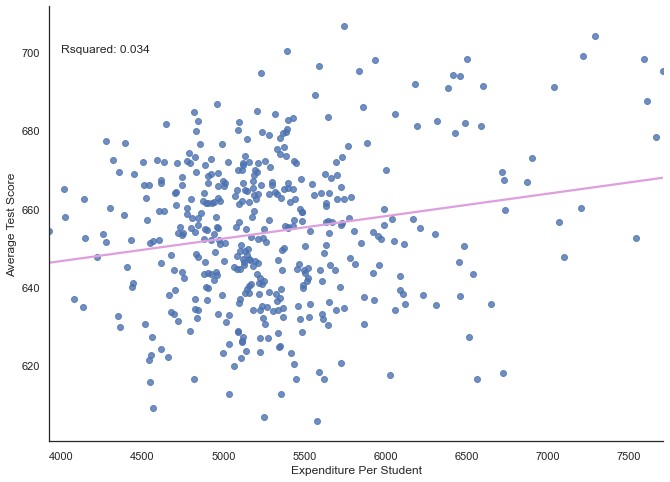

In [61]:
sns.regplot(x='expn_stu', y='testscr', data = schools,ci=False,line_kws = {'color':'plum'})
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
sns.despine()

plt.annotate('Rsquared: {}'.format(rsq.round(3)),
            (4000, 700))
plt.show()

**3.5 LMPlots (SEABORN)**

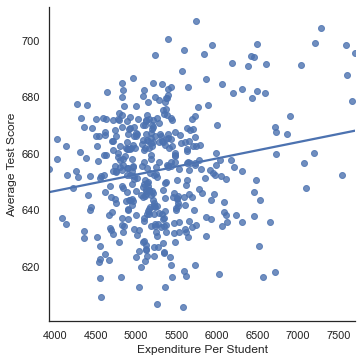

In [62]:
sns.lmplot(x='expn_stu', y='testscr',data = schools, ci=False)

plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
sns.despine()

plt.show()

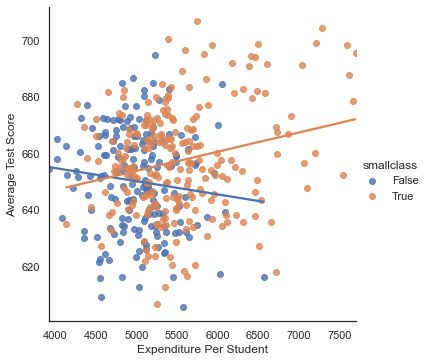

In [63]:
sns.lmplot(x='expn_stu', y='testscr',
           hue = 'smallclass',
           data = schools,
           ci=False)
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
sns.despine()

plt.show()

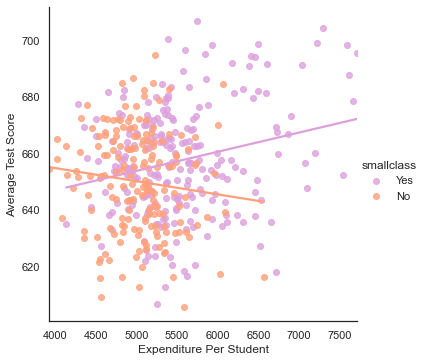

In [64]:
# Colourizing and annotating the lmplot

converter = {0:'No', 1:'Yes'}
schools.smallclass = schools.smallclass.apply(lambda x: converter[x])

sns.lmplot(x='expn_stu', y='testscr',
           hue = 'smallclass',
           data = schools,
           ci=False, palette={'Yes':'plum','No':'lightsalmon'})
plt.xlabel('Expenditure Per Student')
plt.ylabel('Average Test Score')
sns.despine()

plt.show()